# Traced Showcase
## This notebook shows the whole process of training the models

In [4]:
cd .. # move to correct directory with implementation, otherwise use sys.path

/Users/janperina/projects/masters-thesis


In [6]:
ls

Makefile          environment.yaml  requirements.txt  traced_v2/
app/              notebooks/        results/
data/             pytest.ini        tests/
docs/             readme.md         traced/


In [30]:
import glob
import matplotlib.pyplot as plt

In [15]:
from traced_v2.site_analyzer import SiteAnalyzer #import code

In [14]:
loaded_files = sorted(glob.glob("data/pic-CSCS_LCG2/*json"))
print("number of files:", len(loaded_files))

number of files: 28715


In [16]:
analyzer = SiteAnalyzer("Global", "Global") # the parameters will be removed in the future

In [17]:
analyzer.process_files(loaded_files) # process all files, and starts detecting anomalies for all site pairs present

# Per site pair number of anomalies

pic -> CSCS-LCG2


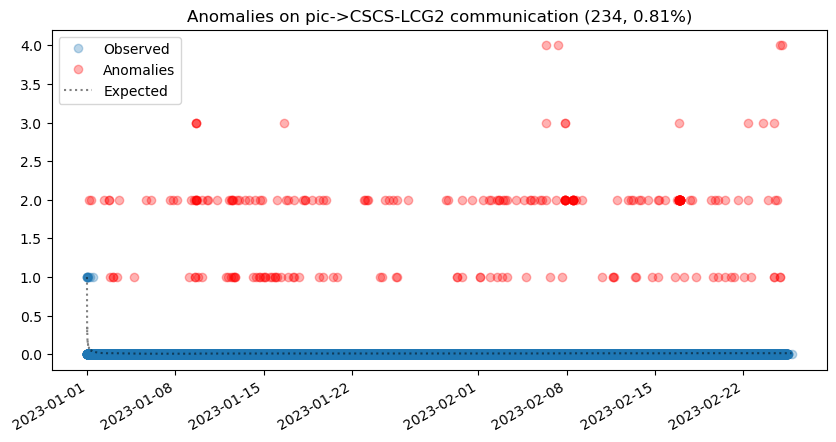

In [38]:
for src, d in analyzer.site_to_site.items():
    for dst, site in d.items():
        print(src, "->", dst)
        fig = plt.figure(figsize=(10, 5))
        site.n_anomalies.plot(kind=f"{src}->{dst} communication", ax=fig.gca())
        plt.show()

# Per trace number of anomalies

Trace:  193.109.172.250-148.187.129.15


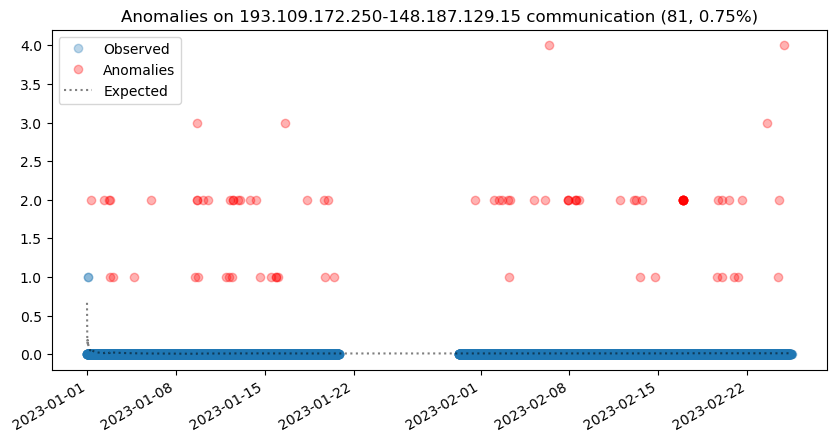

Trace:  193.109.172.242-148.187.129.15


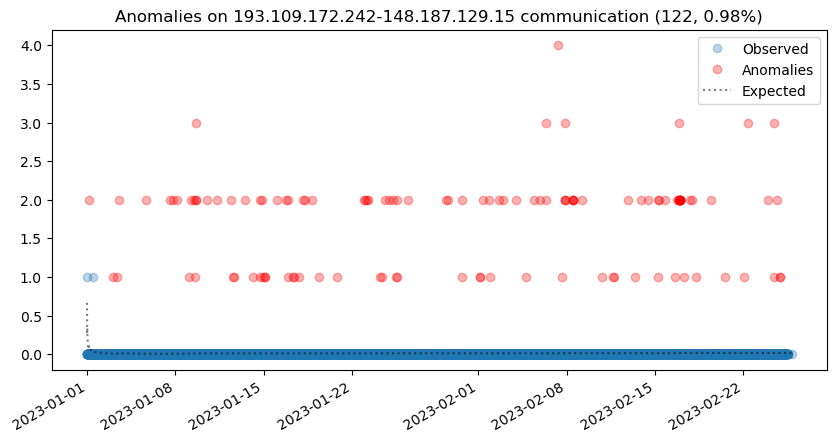

Trace:  2001:67c:1148:204::250-2001:620:808:4129::15


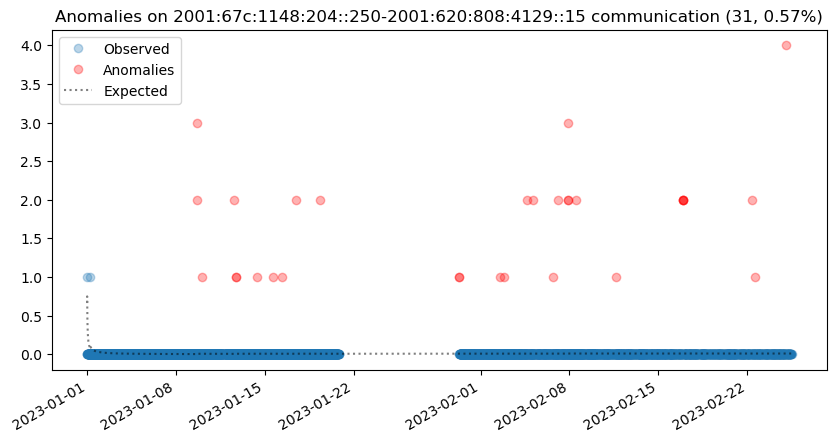

In [46]:
# Anomalies detected per trace (device pair communication)
for trace, analyzer in site.trace_analyzer.items():
    print("Trace: ", trace)
    fig = plt.figure(figsize=(10, 5))
    analyzer.anomalies_model.plot(kind=f"{trace} communication", ax=fig.gca())
    plt.show()


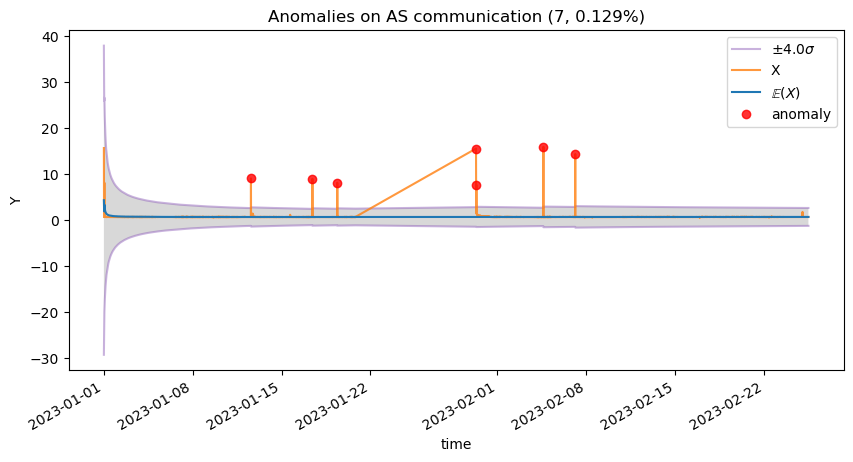

In [53]:
fig = plt.figure(figsize=(10, 5))
analyzer.as_model.prob_model.plot(kind="AS transition probabilities", ax=fig.gca())
plt.show()

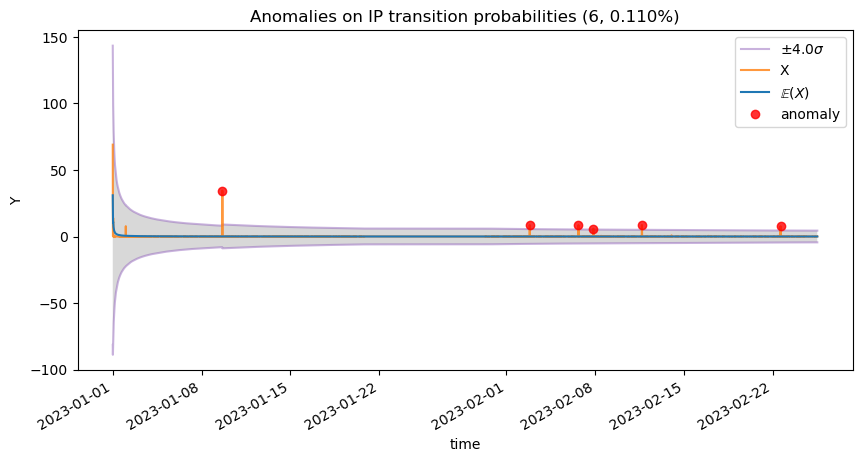

In [67]:
fig = plt.figure(figsize=(10, 5))
analyzer.ip_model.prob_model.plot(kind="IP transition probabilities", ax=fig.gca())
plt.show()

<Figure size 1000x500 with 0 Axes>

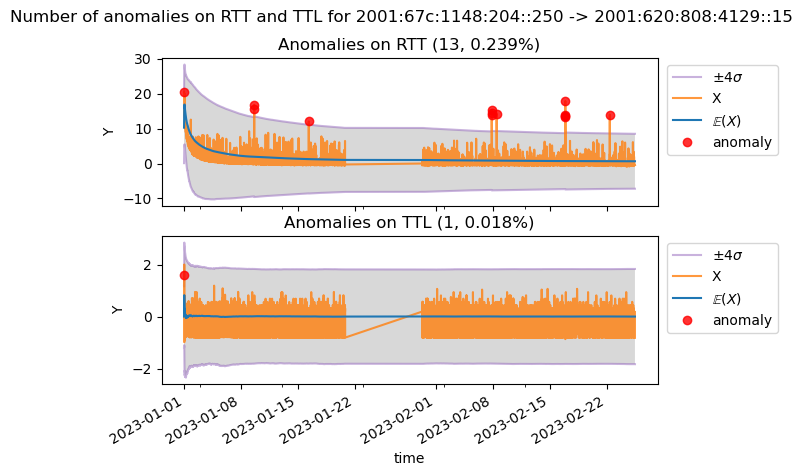

In [68]:
fig = plt.figure(figsize=(10, 5))
analyzer.trace_model.plot()
plt.show()

# Number of hops anomalies

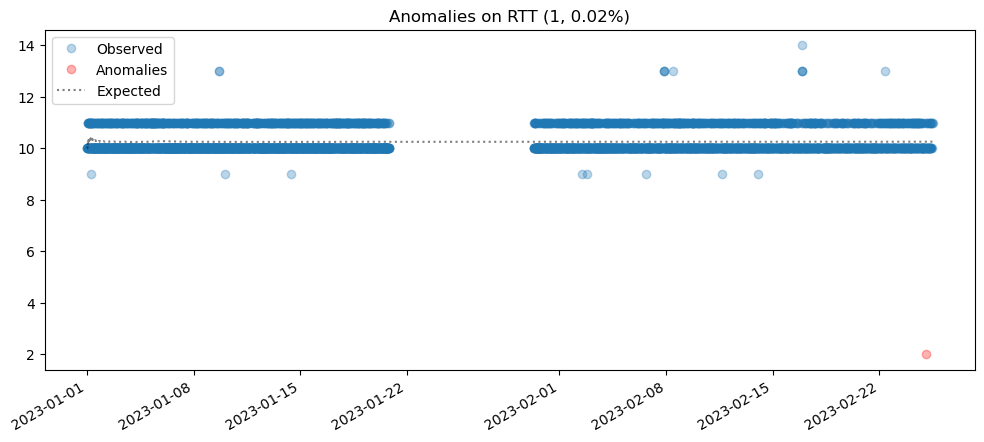

In [73]:
fig = plt.figure(figsize=(12, 5))
analyzer.n_hops_model.plot(ax=fig.gca())
plt.show()

# Pandas dataframe compatibility

In [49]:
# traced allows export of data into pandas dataframe
df = analyzer.to_frame()
df.tail(n=3) 

,ip_path_prob,ip_log_prob_observed_values,ip_log_prob_expected_values,ip_log_prob_sigmas,ip_log_prob_anomalies,as_path_prob,as_log_prob_observed_values,as_log_prob_expected_values,as_log_prob_sigmas,as_log_prob_anomalies,...,trace_model_trace_rtt_sigmas,trace_model_trace_rtt_anomalies,trace_model_trace_ttl_observed_values,trace_model_trace_ttl_expected_values,trace_model_trace_ttl_sigmas,trace_model_trace_ttl_anomalies,trace_model_rtt_sum_errors,trace_model_ttl_sum_errors,trace_model_rtt_mean_errors,trace_model_ttl_mean_errors
2023-02-25 11:06:25,0.259548,0.134881,0.091556,1.100184,False,0.000875,0.704108,0.718868,0.486862,False,...,1.963212,False,-0.808458,0.001054,0.456954,False,-3.824026,-6.467666,-0.347639,-0.587970
2023-02-25 11:15:19,0.724311,0.035837,0.091546,1.100083,False,0.001941,0.693836,0.718864,0.486817,False,...,1.963073,False,0.191507,0.001089,0.456920,False,-2.873911,1.532052,-0.287391,0.153205
2023-02-25 11:57:34,0.259548,0.134881,0.091553,1.099982,False,0.000892,0.702166,0.718861,0.486772,False,...,1.962949,False,-0.808345,0.000940,0.457009,False,-4.922681,-6.466758,-0.447516,-0.587887
